### This dataset has data about breast cancer patient had undergone surgery and lived 5 years or longer after the surgery. This study was done 1958-1970, by University of Chicago's Billings Hospital. This is a pretty small dataset, but big enough for this purpose.

In [1]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

df = pd.read_csv("haberman.csv", header=0)


df = df.rename(columns={'30': 'Age', '64': 'Operation_year', '1' : 'axil_nodes' , '1.1' : 'Survived'})

# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year
# The axillary lymph nodes or armpit lymph nodes are lymph nodes in the human armpit.

df.head(10)

#df.std()

,Age,Operation_year,axil_nodes,Survived
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


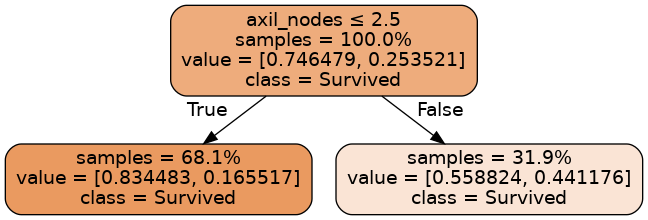

In [2]:
predictors = df.drop(['Survived'],axis=1) # Features
target = df['Survived']


from sklearn.model_selection import train_test_split

predictors_teach, predictors_test, target_teach, target_test = sklearn.model_selection.train_test_split(predictors, target, test_size=0.3, random_state=1) # 70% training and 30% test
decision_tree = DecisionTreeClassifier(criterion="gini",min_impurity_decrease=0.015,max_depth=8 ,min_samples_leaf=20)
decision_tree = decision_tree.fit(predictors_teach, target_teach)
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,impurity=False, proportion=True,precision=6,
                special_characters=True, feature_names = predictors.columns,class_names=['Survived','Died'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [3]:
prediction = decision_tree.predict(predictors_test)

from sklearn import metrics 

accuracy = metrics.accuracy_score(target_test, prediction)

print("accuracy_score:",accuracy)

accuracy_score: 0.7065217391304348


In [211]:
len(prediction)

92

In [212]:
confusion_matrix = metrics.confusion_matrix(target_test, prediction)

print(confusion_matrix)

[[65  0]
 [27  0]]


In [213]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Truth', size = 18)
    plt.xlabel('Prediction', size = 18)

Confusion matrix, without normalization
[[65  0]
 [27  0]]


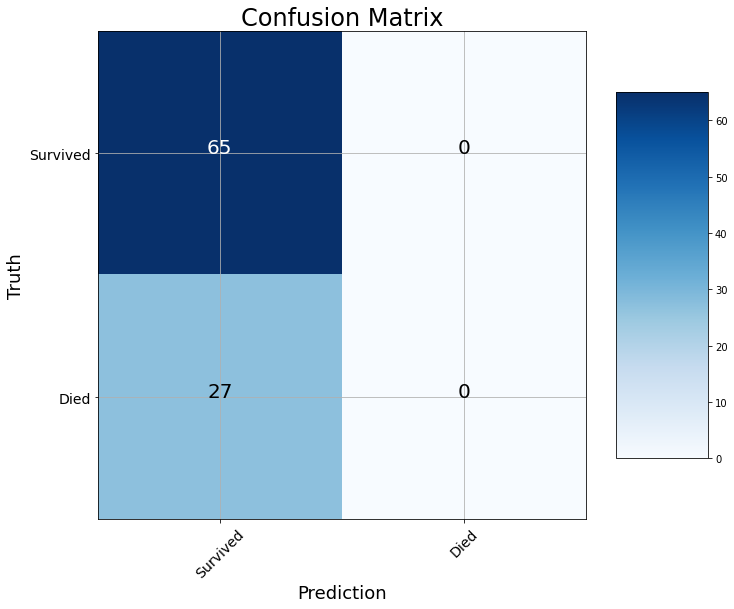

In [214]:
cm = confusion_matrix(target_test, prediction)
plot_confusion_matrix(cm, classes = ['Survived','Died'],
                      normalize = False,
                      title = 'Confusion Matrix')